In [47]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats


1) Проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2) Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3) Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4) Проанализируйте CTR с разбивкой по рекламной кампании.
5) Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6) Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7) Посчитайте конверсию из клика в покупку.

In [2]:
df = pd.read_csv('conversion.csv')

In [3]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [4]:
df.xyz_campaign_id.nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление)
для каждой рекламной кампании в Facebook, прологарифмировав значения. 

In [5]:
df.Impressions

0          7350
1         17861
2           693
3          4259
4          4133
         ...   
1138    1129773
1139     637549
1140     151531
1141     790253
1142     513161
Name: Impressions, Length: 1143, dtype: int64

In [6]:
np.log(df.Impressions)

0        8.902456
1        9.790375
2        6.541030
3        8.356790
4        8.326759
          ...    
1138    13.937527
1139    13.365386
1140    11.928546
1141    13.580108
1142    13.148345
Name: Impressions, Length: 1143, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


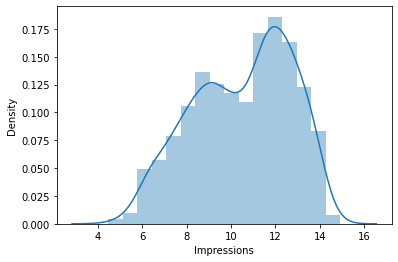

In [12]:
sns.distplot(np.log(df.Impressions))

In [18]:
log_df = np.log(df.groupby('fb_campaign_id').agg({'Impressions':'sum'}))
log_df

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473
...,...
179977,13.937527
179978,13.365386
179979,11.928546


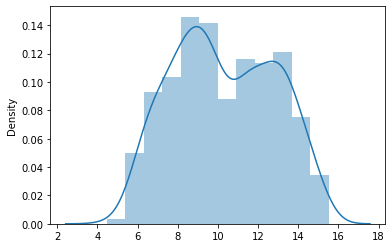

In [30]:
sns.distplot(log_df)
## https://russianblogs.com/article/13901130918/

Теперь несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность,
т.е. отношение числа кликов к количеству показов.

CTR= clicks/impressions
 
Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id
объявления с наибольшим CTR.

In [22]:
df['CTR'] = df.Clicks / df.Impressions

#CTR (Click-Through Rate) — показатель кликабельности.

In [23]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [24]:
df.CTR.idxmax()

150

In [25]:
df.query('index=="150"')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [27]:
df.CTR.sort_values(ascending=False)

150    0.001059
440    0.000845
505    0.000610
476    0.000565
448    0.000531
         ...   
182    0.000000
181    0.000000
516    0.000000
467    0.000000
434    0.000000
Name: CTR, Length: 1143, dtype: float64

In [28]:
df.sort_values(by='CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует 
распределение CTR кампании 916?
Note: параметр bins=20.

In [35]:
df.query('xyz_campaign_id =="916"').CTR

0     0.000136
1     0.000112
2     0.000000
3     0.000235
4     0.000242
5     0.000000
6     0.000192
7     0.000091
8     0.000425
9     0.000316
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000477
15    0.000000
16    0.000434
17    0.000000
18    0.000216
19    0.000190
20    0.000000
21    0.000280
22    0.000164
23    0.000164
24    0.000000
25    0.000000
26    0.000269
27    0.000209
28    0.000182
29    0.000000
30    0.000000
31    0.000294
32    0.000254
33    0.000438
34    0.000458
35    0.000000
36    0.000243
37    0.000324
38    0.000199
39    0.000181
40    0.000000
41    0.000000
42    0.000186
43    0.000315
44    0.000000
45    0.000384
46    0.000399
47    0.000341
48    0.000359
49    0.000262
50    0.000357
51    0.000000
52    0.000398
53    0.000000
Name: CTR, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


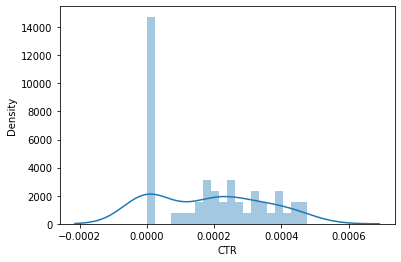

In [42]:
sns.distplot(df.query('xyz_campaign_id =="916"').CTR, bins=20) ## можно добавить kde=False

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег 
на общее число кликов:

CPC= spent/clicks

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 
В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, 
то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо 
использовать метод .dropna().

In [53]:
df['CPC'] = df.Spent / df.Clicks

In [55]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [50]:
scipy.stats.iqr(df.CPC, nan_policy='omit').round(2)

0.25

In [51]:
df.CPC.dropna()

0       1.430000
1       0.910000
3       1.250000
4       1.290000
6       1.590000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Name: CPC, Length: 936, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


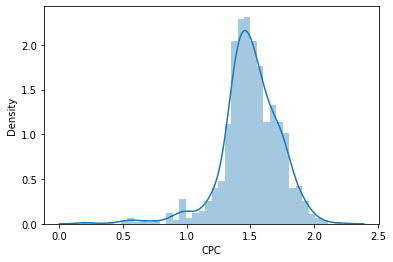

In [56]:
sns.distplot(df.CPC.dropna())

In [57]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [59]:
round(1.644364-1.390000, 2)

0.25

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?
Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, 
что удалять NaN из самого датасета не нужно, только для визуализации. Картинка в полном размере – здесь.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


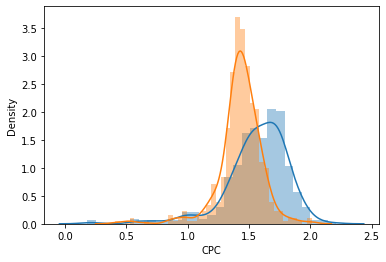

In [75]:
sns.distplot(df.query('gender=="M"').CPC)
sns.distplot(df.query('gender=="F"').CPC)

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, 
к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, 
округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, 
то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [78]:
df['CR'] = df.Approved_Conversion / df.Clicks

In [80]:
df.query('ad_id =="1121814"')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879
